In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from cProfile import label

%matplotlib inline
pd.set_option('display.max_rows', None)

In [2]:
path_gsat_20 = 'gsat_20.csv'
path_gsat_50 = 'gsat_50.csv'
path_gsat_70 = 'gsat_70.csv'

In [3]:
path_probsat_20 = 'probsat_20.csv'
path_probsat_50 = 'probsat_50.csv'
path_probsat_70 = 'probsat_70.csv'

In [9]:
gsat_20 = pd.read_csv(path_gsat_20, delimiter=',')
gsat_50 = pd.read_csv(path_gsat_50, delimiter=',')
gsat_70 = pd.read_csv(path_gsat_70, delimiter=',')

In [10]:
probsat_20 = pd.read_csv(path_probsat_20, delimiter=',')
probsat_50 = pd.read_csv(path_probsat_50, delimiter=',')
probsat_70 = pd.read_csv(path_probsat_70, delimiter=',')

In [23]:
gsat = gsat_20.append(gsat_50, ignore_index=True)
gsat = gsat.append(gsat_70, ignore_index=True)

/tmp/ipykernel_164316/3145544715.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gsat = gsat_20.append(gsat_50, ignore_index=True)
/tmp/ipykernel_164316/3145544715.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gsat = gsat.append(gsat_70, ignore_index=True)


In [24]:
probsat = probsat_20.append(probsat_50, ignore_index=True)
probsat = probsat.append(probsat_70, ignore_index=True)

/tmp/ipykernel_164316/3510634571.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probsat = probsat_20.append(probsat_50, ignore_index=True)
/tmp/ipykernel_164316/3510634571.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probsat = probsat.append(probsat_70, ignore_index=True)


# První domácí úloha

## Zadání
**Experimentální vyhodnocení algoritmu**


Experimentálně srovnejte algoritmy GSAT a probSAT. Určete, který algoritmus dospěje rychleji (v menším počtu iterací) k řešení obtížných instancí 3-SAT v rozsahu 20-75 proměnných. Zdůvodněte použité metody a metriky, popište interpretaci dat.


Uvažujte pevné parametry:
* GSAT: p = 0.4
* probSAT: cm = 0, cb = 2.3

**GSAT**
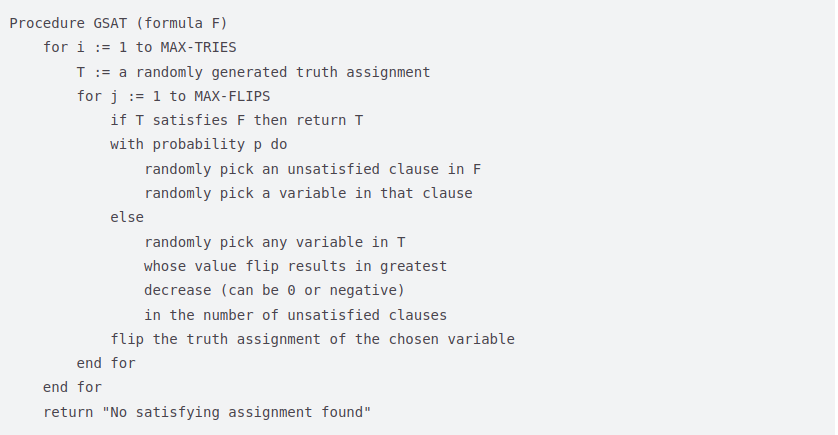

**probSAT**
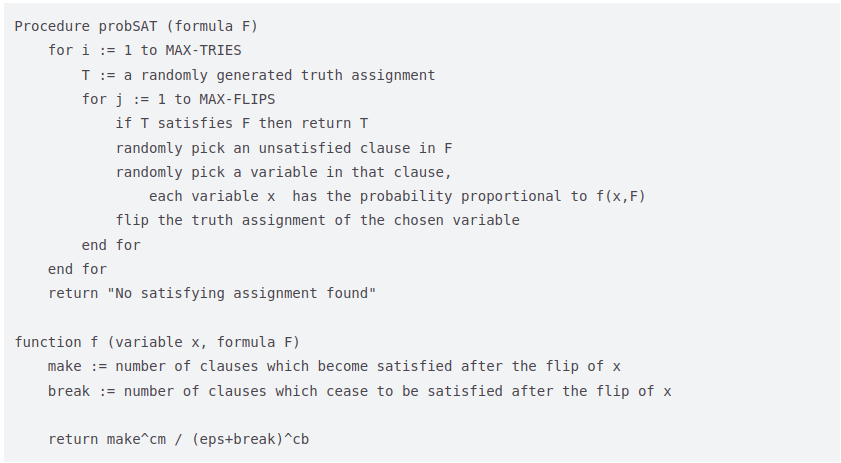

## GSAT

In [25]:
gsat

,inst,succ,steps,max_iter,awg fined,mu,sig^2
0,ruf20-551,1000.0,52.520,3000,52.520,3.515600,0.936389
1,ruf20-73,1000.0,194.329,3000,194.329,4.614462,1.497328
2,ruf20-368,1000.0,174.001,3000,174.001,4.460857,1.648670
3,ruf20-165,1000.0,34.334,3000,34.334,3.128601,0.735732
4,ruf20-713,1000.0,54.794,3000,54.794,3.367686,1.085163
5,ruf20-843,956.0,824.385,3000,2012.385,5.836128,2.753849
6,ruf20-343,1000.0,171.548,3000,171.548,4.538624,1.343557
7,ruf20-923,1000.0,96.903,3000,96.903,3.972874,1.110490
8,ruf20-957,1000.0,125.500,3000,125.500,4.145951,1.338165
9,ruf20-918,1000.0,285.787,3000,285.787,4.843934,2.089085


In [26]:
gsat.describe()

,succ,steps,max_iter,awg fined,mu,sig^2
count,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000.000000
mean,841.358000,897.888121,3000.0,5181.222121,5.656108,1.217764
std,226.063969,792.686176,0.0,6858.576534,1.410103,0.487668
min,47.000000,13.688000,3000.0,13.688000,2.422300,0.106415
25%,741.000000,167.467000,3000.0,167.679500,4.469656,0.911811
50%,969.000000,672.917500,3000.0,1543.131500,5.925235,1.149754
75%,1000.000000,1516.736500,3000.0,8491.688750,6.853531,1.440972
max,1000.000000,2912.398000,3000.0,28600.567000,7.947166,4.563816


In [11]:
gsat_20.head()

,inst,succ,steps,max_iter,awg fined,mu,sig^2
0,ruf20-551,1000.0,52.520,3000,52.520,3.515600,0.936389
1,ruf20-73,1000.0,194.329,3000,194.329,4.614462,1.497328
2,ruf20-368,1000.0,174.001,3000,174.001,4.460857,1.648670
3,ruf20-165,1000.0,34.334,3000,34.334,3.128601,0.735732
4,ruf20-713,1000.0,54.794,3000,54.794,3.367686,1.085163


In [17]:
gsat_20.describe()

,succ,steps,max_iter,awg fined,mu,sig^2
count,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000
mean,997.432000,152.639999,3000.0,221.975999,3.992768,1.396358
std,16.293215,169.098606,0.0,574.756269,0.715976,0.636875
min,744.000000,13.688000,3000.0,13.688000,2.422300,0.380818
25%,1000.000000,53.552500,3000.0,53.552500,3.462264,0.935618
50%,1000.000000,97.319000,3000.0,97.319000,3.937323,1.253003
75%,1000.000000,181.609250,3000.0,182.000500,4.496955,1.704218
max,1000.000000,1331.510000,3000.0,8211.462000,6.260407,4.563816


In [12]:
gsat_50.head()

,inst,succ,steps,max_iter,awg fined,mu,sig^2
0,ruf50-835,996.0,346.589,3000,454.589,5.346139,0.964313
1,ruf50-366,966.0,756.745,3000,1674.745,6.086692,1.300167
2,ruf50-816,990.0,598.028,3000,868.028,5.836155,1.252020
3,ruf50-877,860.0,1242.468,3000,5022.468,6.664628,1.221710
4,ruf50-776,976.0,726.810,3000,1374.810,6.038612,1.381644


In [18]:
gsat_50.describe()

,succ,steps,max_iter,awg fined,mu,sig^2
count,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000
mean,854.592000,965.639748,3000.0,4891.655748,6.098323,1.315913
std,186.254692,616.714093,0.0,5616.152340,0.769551,0.335844
min,47.000000,105.509000,3000.0,105.509000,4.298605,0.509255
25%,771.750000,443.676500,3000.0,604.130000,5.500792,1.081321
50%,936.500000,835.854000,3000.0,2554.730000,6.099515,1.286648
75%,994.000000,1382.211000,3000.0,7489.227250,6.710048,1.528207
max,1000.000000,2869.567000,3000.0,28600.567000,7.852228,2.656941


In [13]:
gsat_70.head()

,inst,succ,steps,max_iter,awg fined,mu,sig^2
0,ruf75-525,882.0,1111.734,3000,4297.734,6.532360,1.163557
1,ruf75-119,306.0,2422.063,3000,21160.063,7.582359,0.704320
2,ruf75-645,911.0,1004.402,3000,3407.402,6.417633,1.177979
3,ruf75-4,602.0,1980.318,3000,12726.318,7.341047,0.715411
4,ruf75-679,904.0,1039.179,3000,3631.179,6.520134,0.976592


In [19]:
gsat_70.describe()

,succ,steps,max_iter,awg fined,mu,sig^2
count,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000
mean,672.050000,1575.384616,3000.0,10430.034616,6.877231,0.941020
std,255.358774,676.294993,0.0,7553.978753,0.637549,0.278030
min,56.000000,144.457000,3000.0,144.457000,4.717957,0.106415
25%,464.000000,1023.090250,3000.0,3590.184000,6.438522,0.766007
50%,714.000000,1592.545000,3000.0,9306.360500,6.969161,0.972101
75%,905.250000,2147.573500,3000.0,16648.115000,7.403174,1.131254
max,1000.000000,2912.398000,3000.0,28400.398000,7.947166,1.827463


# PROBSAT

In [27]:
probsat

,inst,succ,steps,max_iter,awg fined,mu,sig^2
0,ruf20-551,1000.0,41.559,NaN,41.559,3.289269,0.870453
1,ruf20-73,1000.0,136.458,NaN,136.458,4.446896,1.118555
2,ruf20-368,1000.0,98.229,NaN,98.229,4.154754,0.978792
3,ruf20-165,1000.0,30.594,NaN,30.594,3.143808,0.554245
4,ruf20-713,1000.0,47.070,NaN,47.070,3.363232,0.859760
5,ruf20-843,998.0,414.619,NaN,468.619,5.354627,1.860818
6,ruf20-343,1000.0,115.537,NaN,115.537,4.319880,0.952808
7,ruf20-923,1000.0,66.960,NaN,66.960,3.903195,0.660008
8,ruf20-957,1000.0,82.767,NaN,82.767,3.986313,0.927308
9,ruf20-918,1000.0,165.879,NaN,165.879,4.516048,1.396790


In [53]:
gsat.describe()

,succ,steps,max_iter,awg fined,mu,sig^2
count,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000.000000
mean,841.358000,897.888121,3000.0,5181.222121,5.656108,1.217764
std,226.063969,792.686176,0.0,6858.576534,1.410103,0.487668
min,47.000000,13.688000,3000.0,13.688000,2.422300,0.106415
25%,741.000000,167.467000,3000.0,167.679500,4.469656,0.911811
50%,969.000000,672.917500,3000.0,1543.131500,5.925235,1.149754
75%,1000.000000,1516.736500,3000.0,8491.688750,6.853531,1.440972
max,1000.000000,2912.398000,3000.0,28600.567000,7.947166,4.563816


In [28]:
probsat.describe()

,succ,steps,max_iter,awg fined,mu,sig^2
count,4000.000000,4000.000000,3000.0,4000.000000,4000.000000,4000.000000
mean,950.272000,475.613593,3000.0,1818.269593,4.954981,0.922263
std,132.072903,589.626739,0.0,4099.182286,1.347774,0.339488
min,38.000000,13.147000,3000.0,13.147000,2.406333,0.154709
25%,987.750000,68.381000,3000.0,68.381000,3.782219,0.683060
50%,1000.000000,194.305000,3000.0,194.744500,4.786174,0.860741
75%,1000.000000,672.773750,3000.0,1036.960250,6.089901,1.092064
max,1000.000000,2912.043000,3000.0,28886.043000,7.911960,3.205674


In [52]:
gsat.describe()

,succ,steps,max_iter,awg fined,mu,sig^2
count,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000.000000
mean,841.358000,897.888121,3000.0,5181.222121,5.656108,1.217764
std,226.063969,792.686176,0.0,6858.576534,1.410103,0.487668
min,47.000000,13.688000,3000.0,13.688000,2.422300,0.106415
25%,741.000000,167.467000,3000.0,167.679500,4.469656,0.911811
50%,969.000000,672.917500,3000.0,1543.131500,5.925235,1.149754
75%,1000.000000,1516.736500,3000.0,8491.688750,6.853531,1.440972
max,1000.000000,2912.398000,3000.0,28600.567000,7.947166,4.563816


In [14]:
probsat_20.head()

,inst,succ,steps,max_iter,awg fined,mu,sig^2
0,ruf20-551,1000.0,41.559,NaN,41.559,3.289269,0.870453
1,ruf20-73,1000.0,136.458,NaN,136.458,4.446896,1.118555
2,ruf20-368,1000.0,98.229,NaN,98.229,4.154754,0.978792
3,ruf20-165,1000.0,30.594,NaN,30.594,3.143808,0.554245
4,ruf20-713,1000.0,47.070,NaN,47.070,3.363232,0.859760


In [20]:
probsat_20.describe()

,succ,steps,max_iter,awg fined,mu,sig^2
count,2000.000000,2000.000000,1000.0,2000.000000,2000.000000,2000.000000
mean,999.802000,93.515445,3000.0,98.861445,3.809355,1.002052
std,2.963644,84.721943,0.0,143.081277,0.599257,0.394507
min,915.000000,13.147000,3000.0,13.147000,2.406333,0.343722
25%,1000.000000,41.469750,3000.0,41.469750,3.359591,0.707308
50%,1000.000000,68.357000,3000.0,68.357000,3.781486,0.920958
75%,1000.000000,118.530750,3000.0,118.530750,4.221768,1.205005
max,1000.000000,956.970000,3000.0,3251.970000,5.928979,3.205674


In [15]:
probsat_50.head()

,inst,succ,steps,max_iter,awg fined,mu,sig^2
0,ruf50-835,1000.0,218.703,3000,218.703,5.109488,0.571325
1,ruf50-366,999.0,425.117,3000,452.117,5.642615,0.897724
2,ruf50-816,999.0,324.862,3000,351.862,5.359001,0.871206
3,ruf50-877,988.0,782.763,3000,1106.763,6.244250,1.021754
4,ruf50-776,1000.0,377.636,3000,377.636,5.517857,0.947230


In [21]:
probsat_50.describe()

,succ,steps,max_iter,awg fined,mu,sig^2
count,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000
mean,953.233000,606.472591,3000.0,1869.181591,5.714575,0.922224
std,110.438441,482.584469,0.0,3417.170882,0.726315,0.278774
min,38.000000,80.732000,3000.0,80.732000,4.161456,0.307718
25%,969.750000,253.795750,3000.0,254.701750,5.164033,0.705107
50%,999.000000,433.129500,3000.0,479.716000,5.666936,0.894030
75%,1000.000000,806.646500,3000.0,1614.584750,6.233064,1.112005
max,1000.000000,2912.043000,3000.0,28886.043000,7.911960,1.819871


In [16]:
probsat_70.head()

,inst,succ,steps,max_iter,awg fined,mu,sig^2
0,ruf75-525,992.0,601.319,3000,817.319,6.013526,0.815612
1,ruf75-119,608.0,1893.656,3000,12477.656,7.226264,0.922641
2,ruf75-645,1000.0,463.605,3000,463.605,5.813638,0.676964
3,ruf75-4,863.0,1370.254,3000,5069.254,6.918383,0.742993
4,ruf75-679,988.0,689.991,3000,1013.991,6.167844,0.789314


In [22]:
probsat_70.describe()

,succ,steps,max_iter,awg fined,mu,sig^2
count,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000
mean,848.251000,1108.950892,3000.0,5206.173892,6.486638,0.762723
std,205.602365,658.394311,0.0,6175.353691,0.686947,0.184357
min,106.000000,116.324000,3000.0,116.324000,4.572804,0.154709
25%,766.750000,552.950500,3000.0,651.116250,5.965202,0.645347
50%,948.500000,975.178500,3000.0,2400.327500,6.473511,0.757995
75%,997.000000,1589.788500,3000.0,7894.050750,7.038477,0.884828
max,1000.000000,2836.592000,3000.0,26931.740000,7.904285,1.534861


# Porovnání algoritmů

In [42]:
def make_graph(feature, df_gsat, df_probsat, HEIGTH=12, WIDTH=12):
    bins = 200
    ROWS=1
    COLS=1
    plt.figure(figsize=(WIDTH, HEIGTH))

    # histogram of the data
    plt.subplot(ROWS, COLS, 1)
    df_probsat[feature].plot(kind = 'hist', bins = bins, edgecolor = 'black', color='b', density = True, alpha=0.5)
    

    # histogram of the data
    plt.subplot(ROWS, COLS, 1)
    df_gsat[feature].plot(kind = 'hist', bins = bins, edgecolor = 'black', color='y', density = True, alpha=0.5)
    plt.legend(labels=['probsat', 'gsat'])
    plt.title(feature)

    plt.show()

In [43]:
def make_graph_1(feature, HEIGTH=36, WIDTH=12):
    bins = 100
    ROWS=3
    COLS=1
    plt.figure(figsize=(WIDTH, HEIGTH))

    # histogram of the data
    plt.subplot(ROWS, COLS, 1)
    probsat_20[feature].plot(kind = 'hist', bins = bins, edgecolor = 'black', color='b', density = True, alpha=0.5)
    

    # histogram of the data
    plt.subplot(ROWS, COLS, 1)
    gsat_20[feature].plot(kind = 'hist', bins = bins, edgecolor = 'black', color='y', density = True, alpha=0.5)
    plt.legend(labels=['probsat', 'gsat'])
    plt.title('20 proměnných')
    
    # histogram of the data
    plt.subplot(ROWS, COLS, 2)
    probsat_50[feature].plot(kind = 'hist', bins = bins, edgecolor = 'black', color='b', density = True, alpha=0.5)
    

    # histogram of the data
    plt.subplot(ROWS, COLS, 2)
    gsat_50[feature].plot(kind = 'hist', bins = bins, edgecolor = 'black', color='y', density = True, alpha=0.5)
    plt.legend(labels=['probsat', 'gsat'])
    plt.title('50 proměnných')
    
    # histogram of the data
    plt.subplot(ROWS, COLS, 3)
    probsat_70[feature].plot(kind = 'hist', bins = bins, edgecolor = 'black', color='b', density = True, alpha=0.5)
    

    # histogram of the data
    plt.subplot(ROWS, COLS, 3)
    gsat_70[feature].plot(kind = 'hist', bins = bins, edgecolor = 'black', color='y', density = True, alpha=0.5)
    plt.legend(labels=['probsat', 'gsat'])
    plt.title('75 proměnných')

    plt.show()

# Srovnání průměrného počtu kroků algoritmů

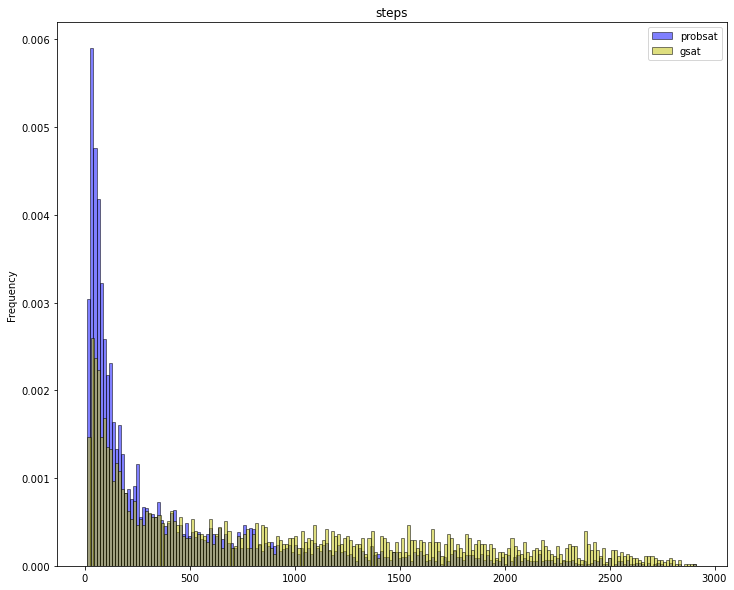

In [47]:
make_graph('steps', gsat, probsat, HEIGTH=10, WIDTH=12)

# Srovnání váženého průměru počtu kroků algoritmů

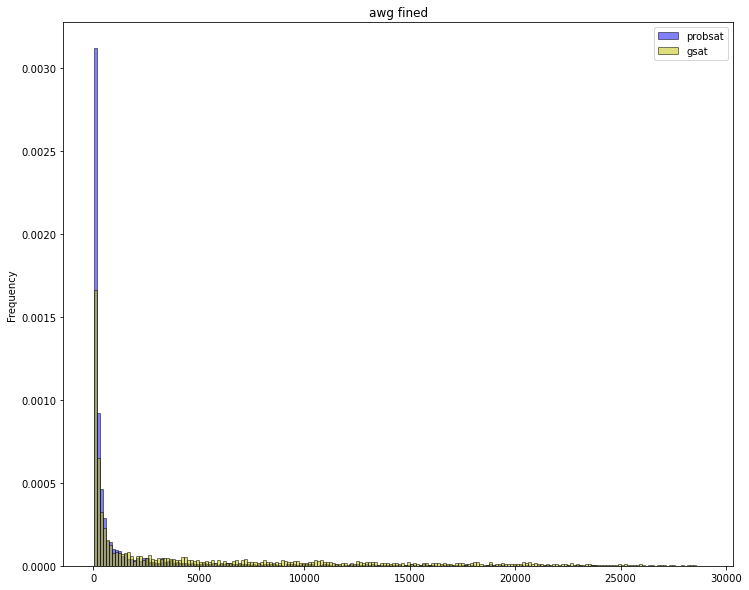

In [46]:
make_graph('awg fined', gsat, probsat, HEIGTH=10, WIDTH=12)

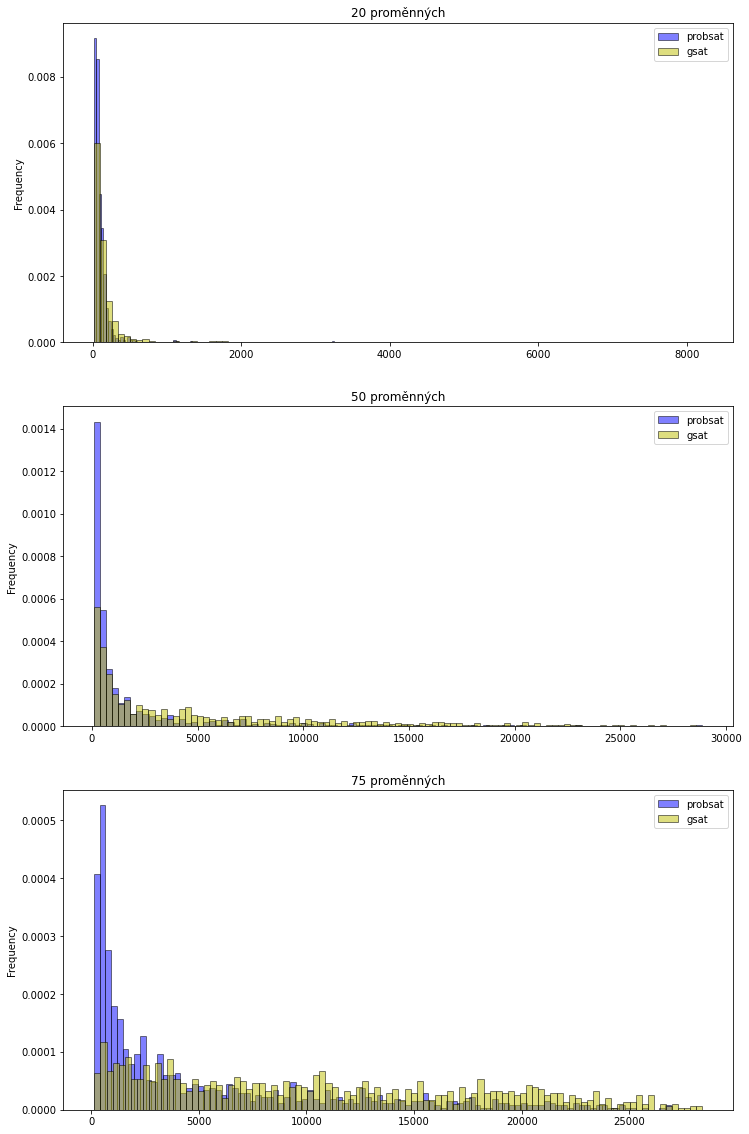

In [45]:
make_graph_1('awg fined', HEIGTH=20, WIDTH=12)

# Srovnání počtu úspěšných běhů

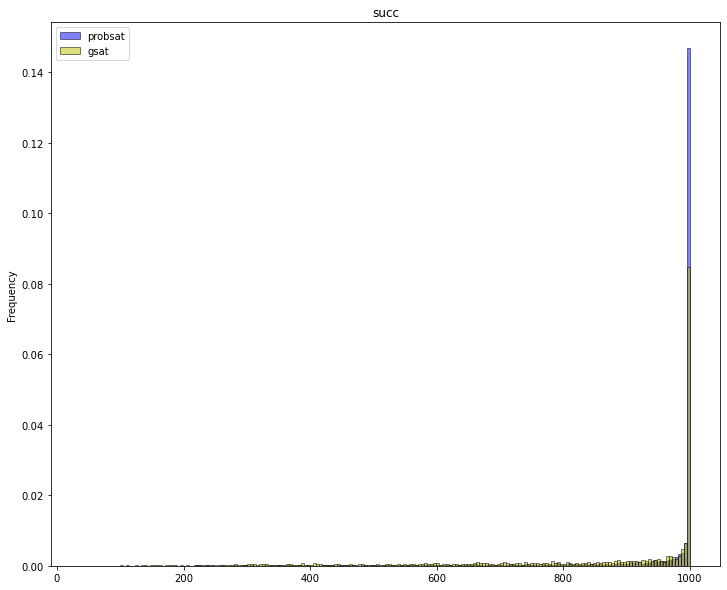

In [48]:
make_graph('succ', gsat, probsat, HEIGTH=10, WIDTH=12)

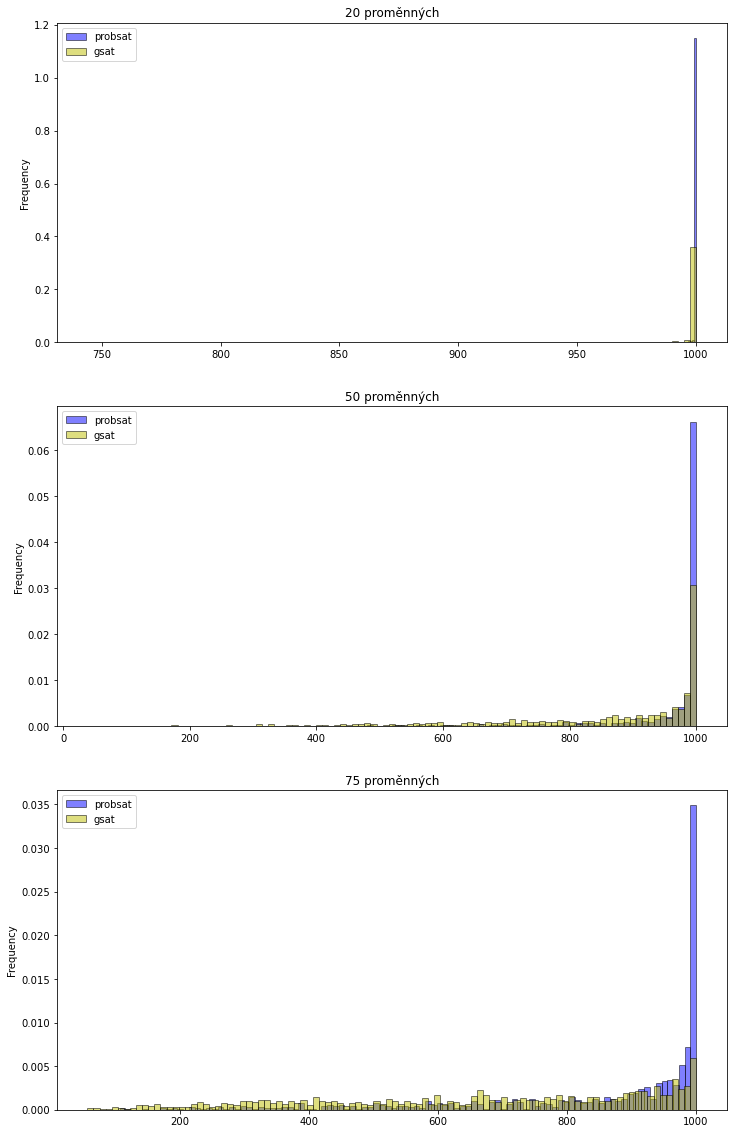

In [49]:
make_graph_1('succ', HEIGTH=20, WIDTH=12)

In [50]:
gsat_20[gsat_20['succ'] != 1000].style.apply(lambda x: ['background: lightblue' if x.name == 'succ'
                          else '' for i in x])

,inst,succ,steps,max_iter,awg fined,mu,sig^2
5,ruf20-843,956.000000,824.385000,3000,2012.385000,5.836128,2.753849
16,ruf20-618,994.000000,431.426000,3000,593.426000,5.288560,2.093093
29,ruf20-245,997.000000,347.741000,3000,428.741000,4.897254,2.566069
35,ruf20-302,896.000000,1061.791000,3000,3869.791000,6.173962,2.623811
45,ruf20-807,985.000000,516.929000,3000,921.929000,5.115822,3.023507
79,ruf20-444,996.000000,342.785000,3000,450.785000,4.257161,3.478729
82,ruf20-653,998.000000,302.802000,3000,356.802000,4.762645,2.284228
102,ruf20-345,993.000000,499.636000,3000,688.636000,5.293510,2.612175
103,ruf20-870,999.000000,369.488000,3000,396.488000,5.010706,2.485944
105,ruf20-598,994.000000,539.545000,3000,701.545000,5.391307,2.553422


In [51]:
len(gsat_20[gsat_20['succ'] != 1000])

116